<h1> PROJECT MACHINE LEARNING </h1>

<h4> Import the necessary packages </h4>

In [200]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [201]:
import plotly.express as px

<h4> Define the file path of the csv data file </h4>

In [202]:
file_path = "../Dataset/books.csv"

<h2> Data Trasformation part </h2>

In [203]:
books = pd.read_csv(file_path, sep=',')
test = pd.read_csv(file_path, sep=',')

In [204]:
# gets the data type of each column
books.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

<h4> Rename the num_pages column </h4>

In [205]:
books.rename(columns={"  num_pages": "num_pages"}, inplace=True)

In [206]:
books.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

<h4> Search for invalide date and turn it to NaT </h4>

In [207]:
try:
    # Convert the 'publication_date' column to datetime with 'coerce' option to handle invalid dates
    books['publication_date'] = pd.to_datetime(books['publication_date'], errors='coerce')
    
    # Find rows with invalid dates
    invalid_dates = books[books['publication_date'].isnull()]
    
    # Print the rows with invalid dates
    print(invalid_dates[['bookID', 'average_rating', 'publication_date']])
    
except Exception as e:
    print(e)


       bookID  average_rating publication_date
8180    31373            4.10              NaT
11098   45531            3.96              NaT


In [208]:
new_types_dict = {"title":"string", "authors":"string", "language_code":"category", "publisher":"category","isbn":"string", "isbn13":"string","average_rating":"float64","num_pages":"int64", "ratings_count":"int64","text_reviews_count":"int64","publication_date": "datetime64[ns]"}

# turn the books dataframe into a dataframe with the new types
books = books.astype(new_types_dict)
books.dtypes

bookID                         int64
title                         string
authors                       string
average_rating               float64
isbn                          string
isbn13                        string
language_code               category
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                   category
dtype: object

<h4> Make language code lowercase </h4>

In [209]:
books["language_code"] = books["language_code"].str.lower()

# print all values of books["language_code"] distinct with their occurence count
books["language_code"].value_counts()

eng      8911
en-us    1409
spa       218
en-gb     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-ca       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

<h4> Verify if there are null values </h4>

In [210]:
books.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64

In [211]:
books[books['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8180,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books
11098,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire


<h2> Data Analysis part </h2>

In [212]:
pd.options.display.float_format = '{:.2f}'.format
books.describe()[['average_rating', 'ratings_count', 'text_reviews_count']]

,average_rating,ratings_count,text_reviews_count
count,11127.00,11127.00,11127.00
mean,3.93,17936.41,541.85
std,0.35,112479.44,2576.18
min,0.00,0.00,0.00
25%,3.77,104.00,9.00
50%,3.96,745.00,46.00
75%,4.13,4993.50,237.50
max,5.00,4597666.00,94265.00


In [213]:
books.corr()

C:\Users\CJFP8016\AppData\Local\Temp\1\ipykernel_11232\4217152511.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,bookID,average_rating,num_pages,ratings_count,text_reviews_count
bookID,1.00,-0.04,-0.03,-0.08,-0.08
average_rating,-0.04,1.00,0.15,0.04,0.03
num_pages,-0.03,0.15,1.00,0.03,0.04
ratings_count,-0.08,0.04,0.03,1.00,0.87
text_reviews_count,-0.08,0.03,0.04,0.87,1.00


C:\Users\CJFP8016\AppData\Local\Temp\1\ipykernel_11232\1284252131.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



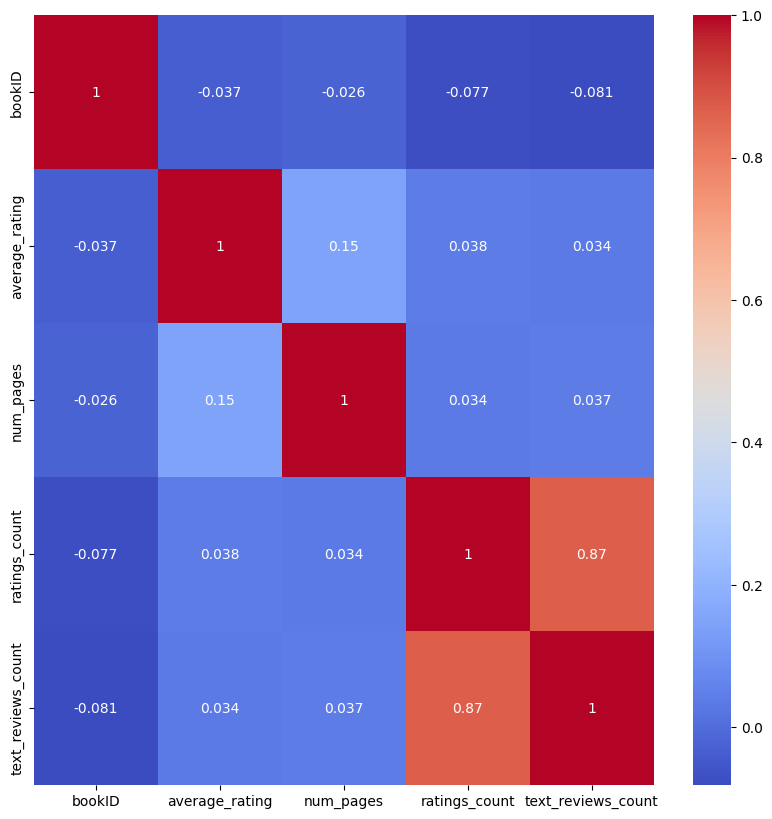

In [214]:
plt.figure(figsize=(10, 10))
sns.heatmap(books.corr(), annot=True, cmap='coolwarm')
plt.show()

<p> From the outputs above, we can deduce that the ratings count has a high correlation coefficient with the text_review_count </p>

In [215]:
from matplotlib import pyplot as plt

In [219]:
px.scatter(data_frame=books,x='average_rating',y='ratings_count',color='text_reviews_count',title='Average Rating vs Ratings Count')